#### Fine tuning Yolov11 model on our custom dataset :

In [ ]:
!nvidia-smi

Fri Feb 14 12:32:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
!rm -rf /root/.config/Google/

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### Download our dataset from roboflow :

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
rf = Roboflow(api_key="QBcIGwku5EDtTx0E0W0b")
project = rf.workspace("infantbabiessleep").project("sudden-infant-death-syndrome")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sudden-infant-death-syndrome-3 in yolov11:: 100%|██████████| 15970/15970 [00:03<00:00, 4389.16it/s]


#### Balanced  Classes :

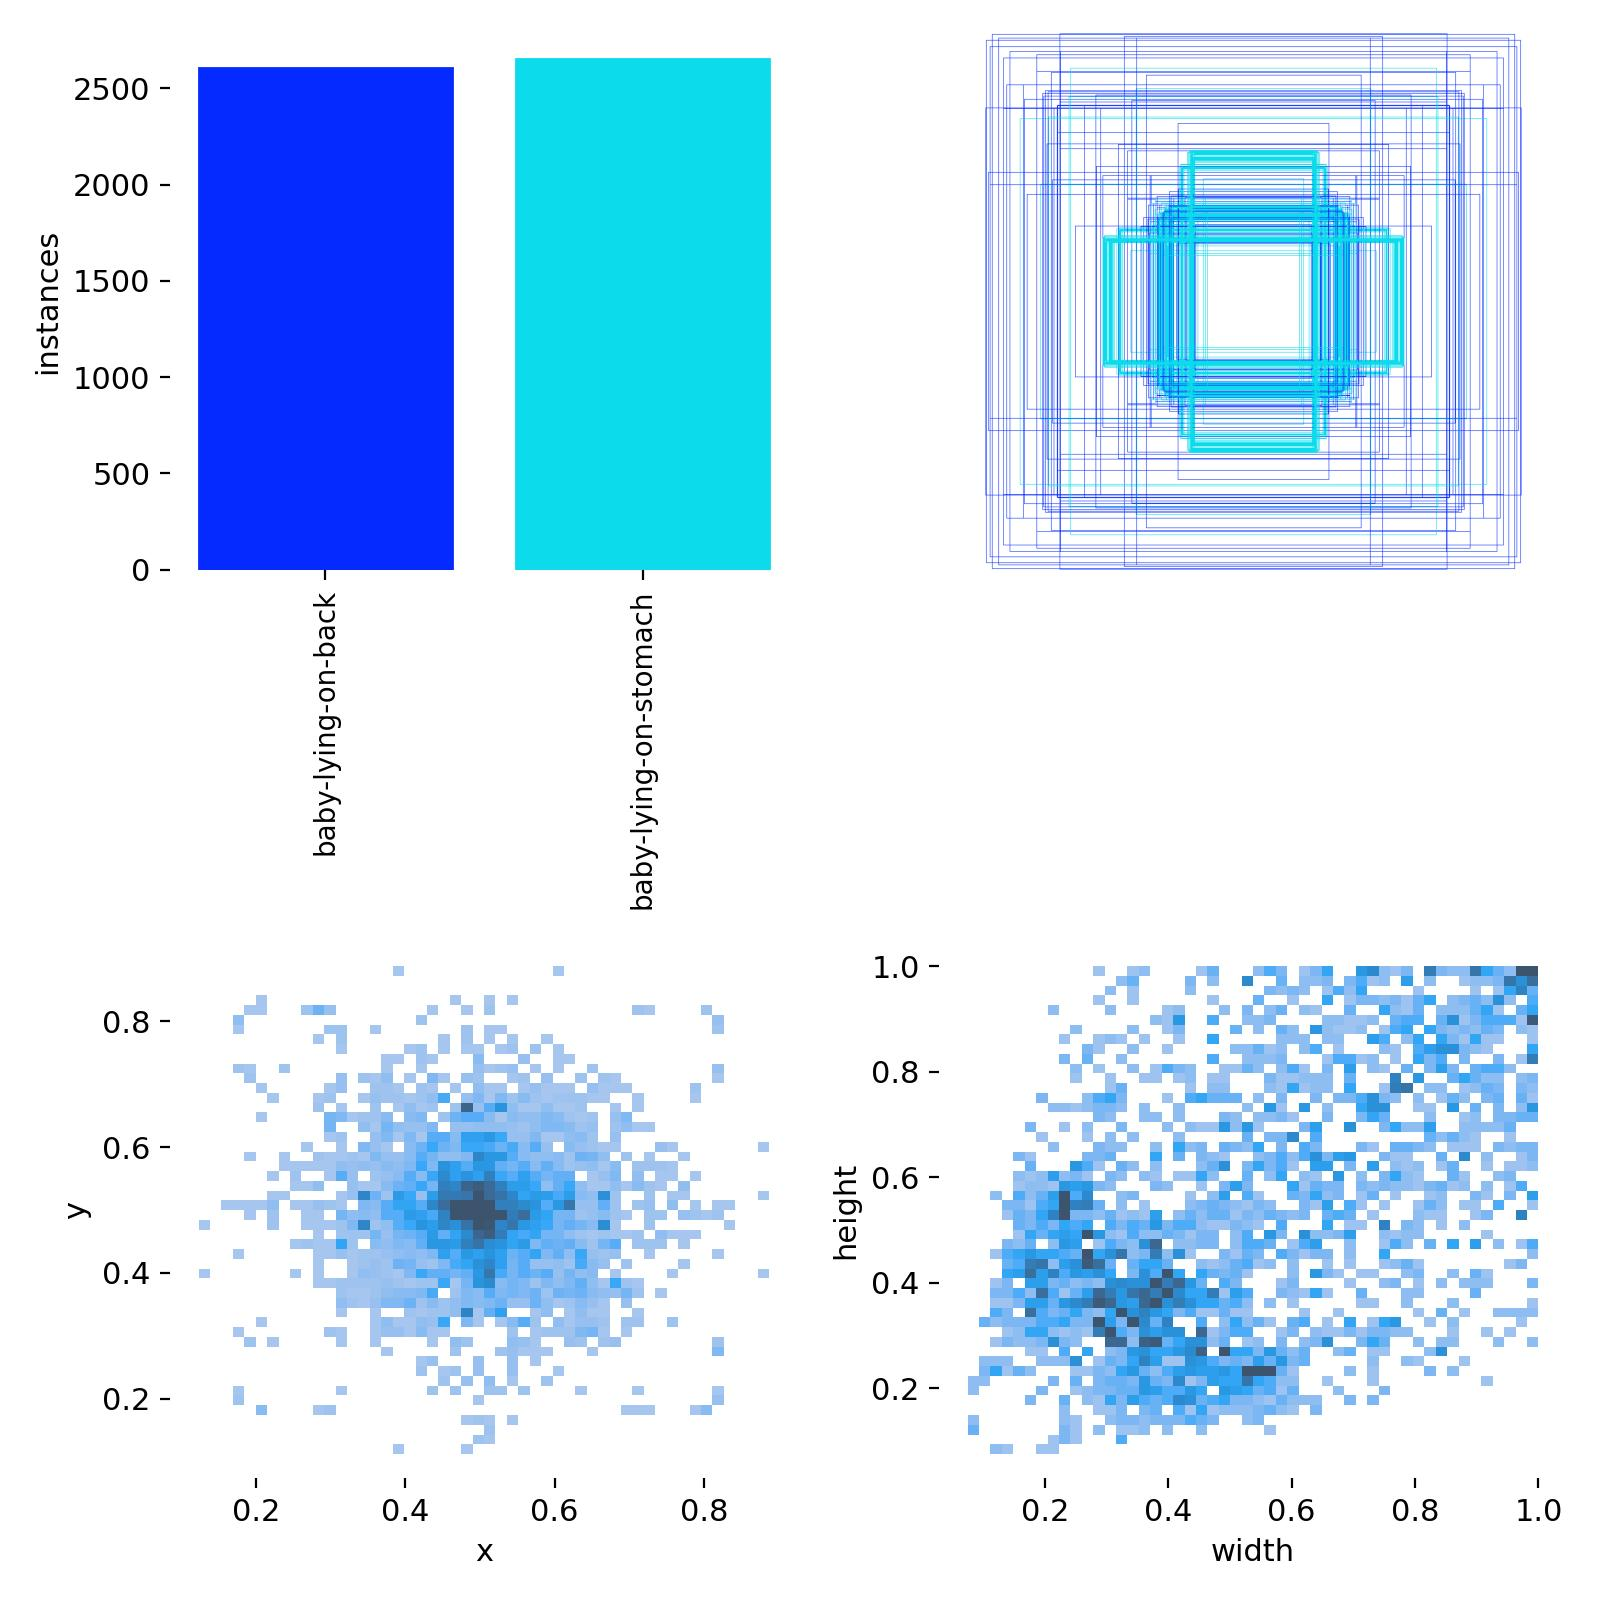

In [33]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

#### Custom Training :

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 183MB/s]
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/sudden-infant-death-syndrome-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

In [ ]:
!cp -r {HOME}/datasets /content/drive/MyDrive/
!cp -r runs /content/drive/MyDrive/
!cp -r runs/* /content/drive/MyDrive/

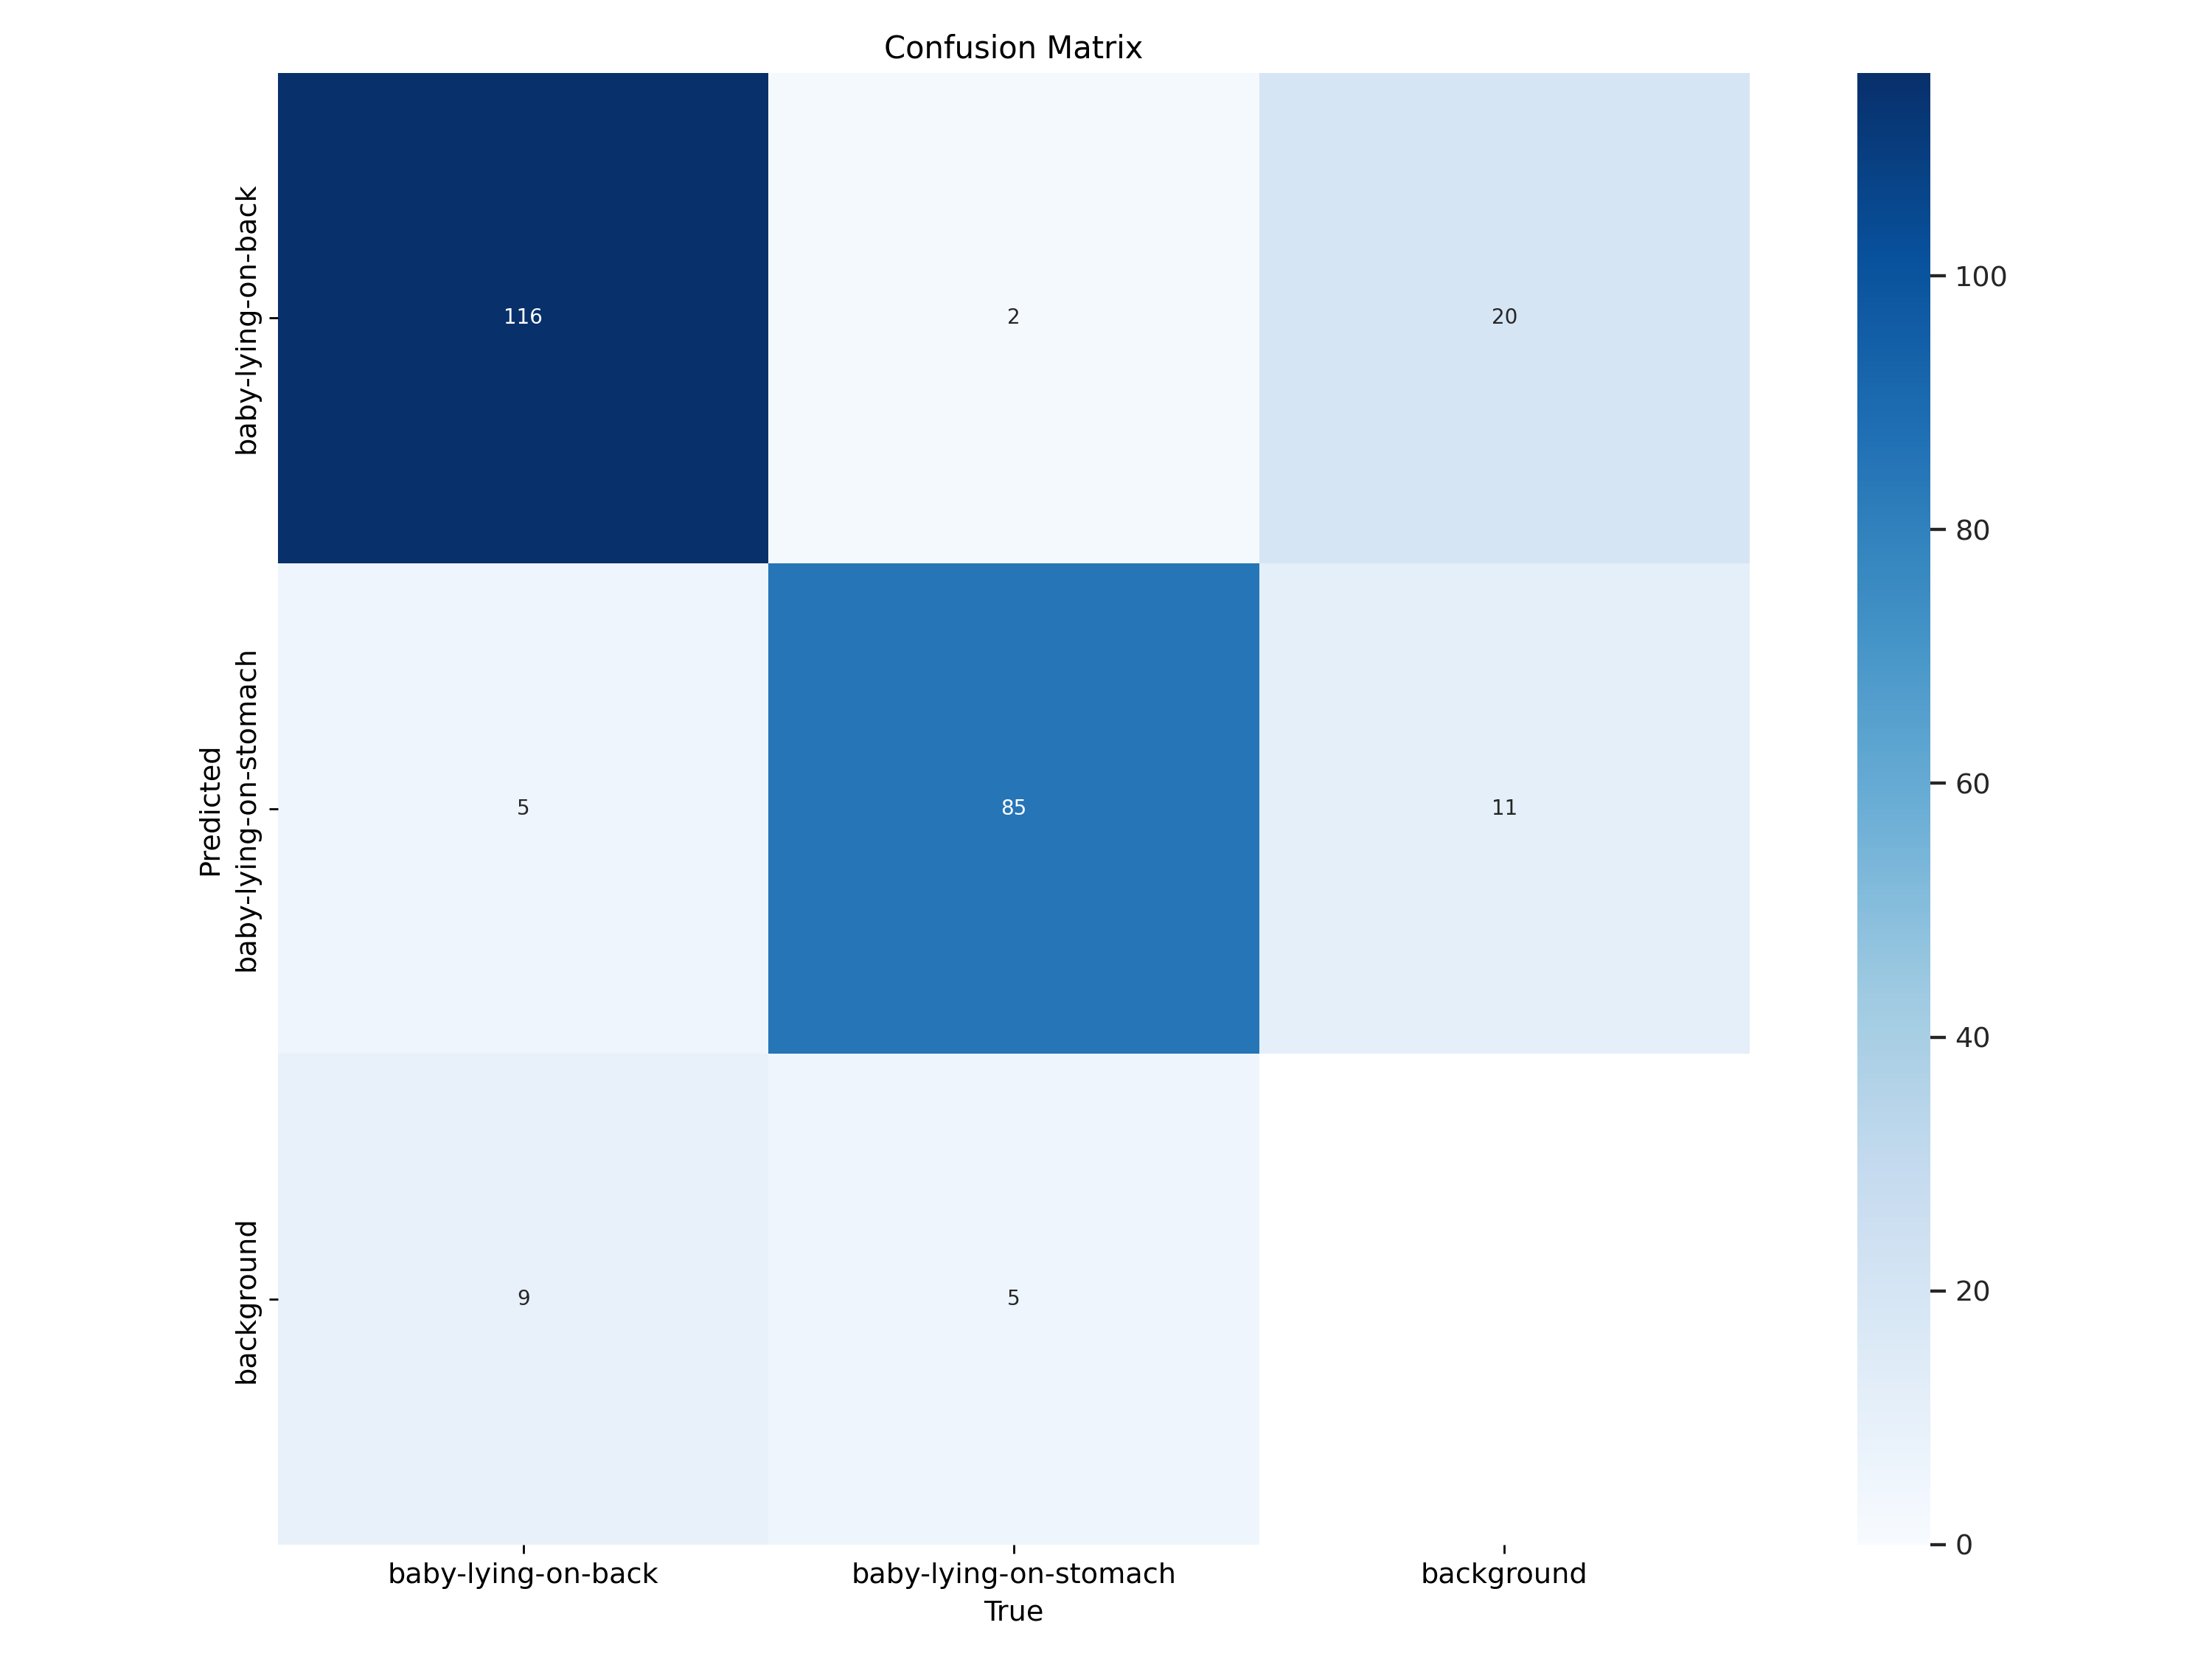

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
!ls -R /content/runs/detect/train/

/content/runs/detect/train/:
args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1739536561.7d64ee4dc43c.2002.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch18440.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch18441.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch18442.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg

/content/runs/detect/train/weights:
best.pt  last.pt


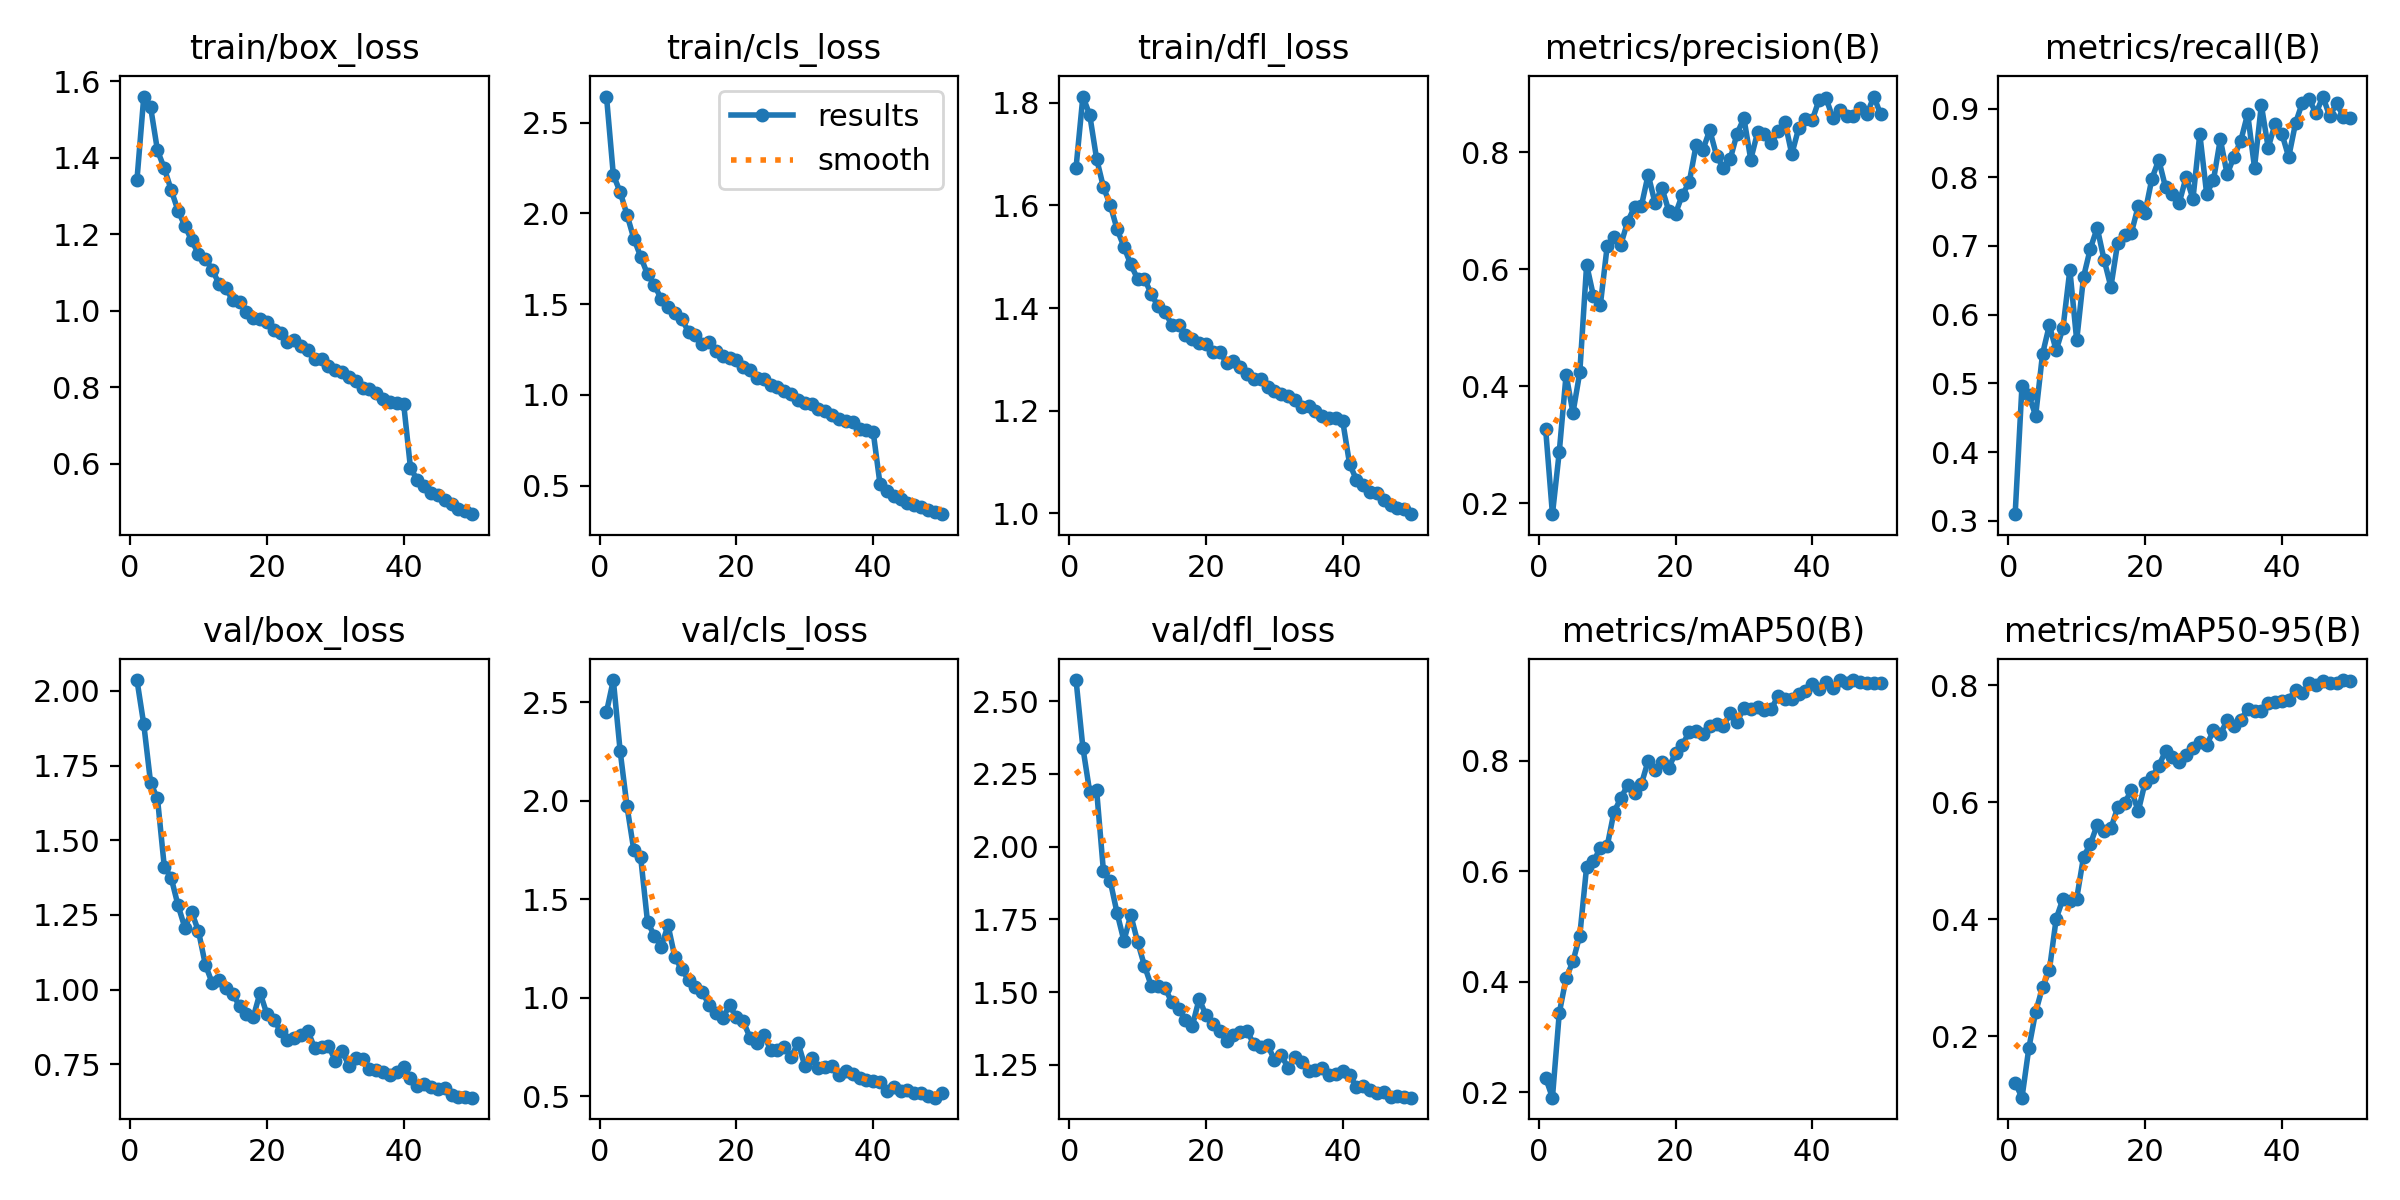

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

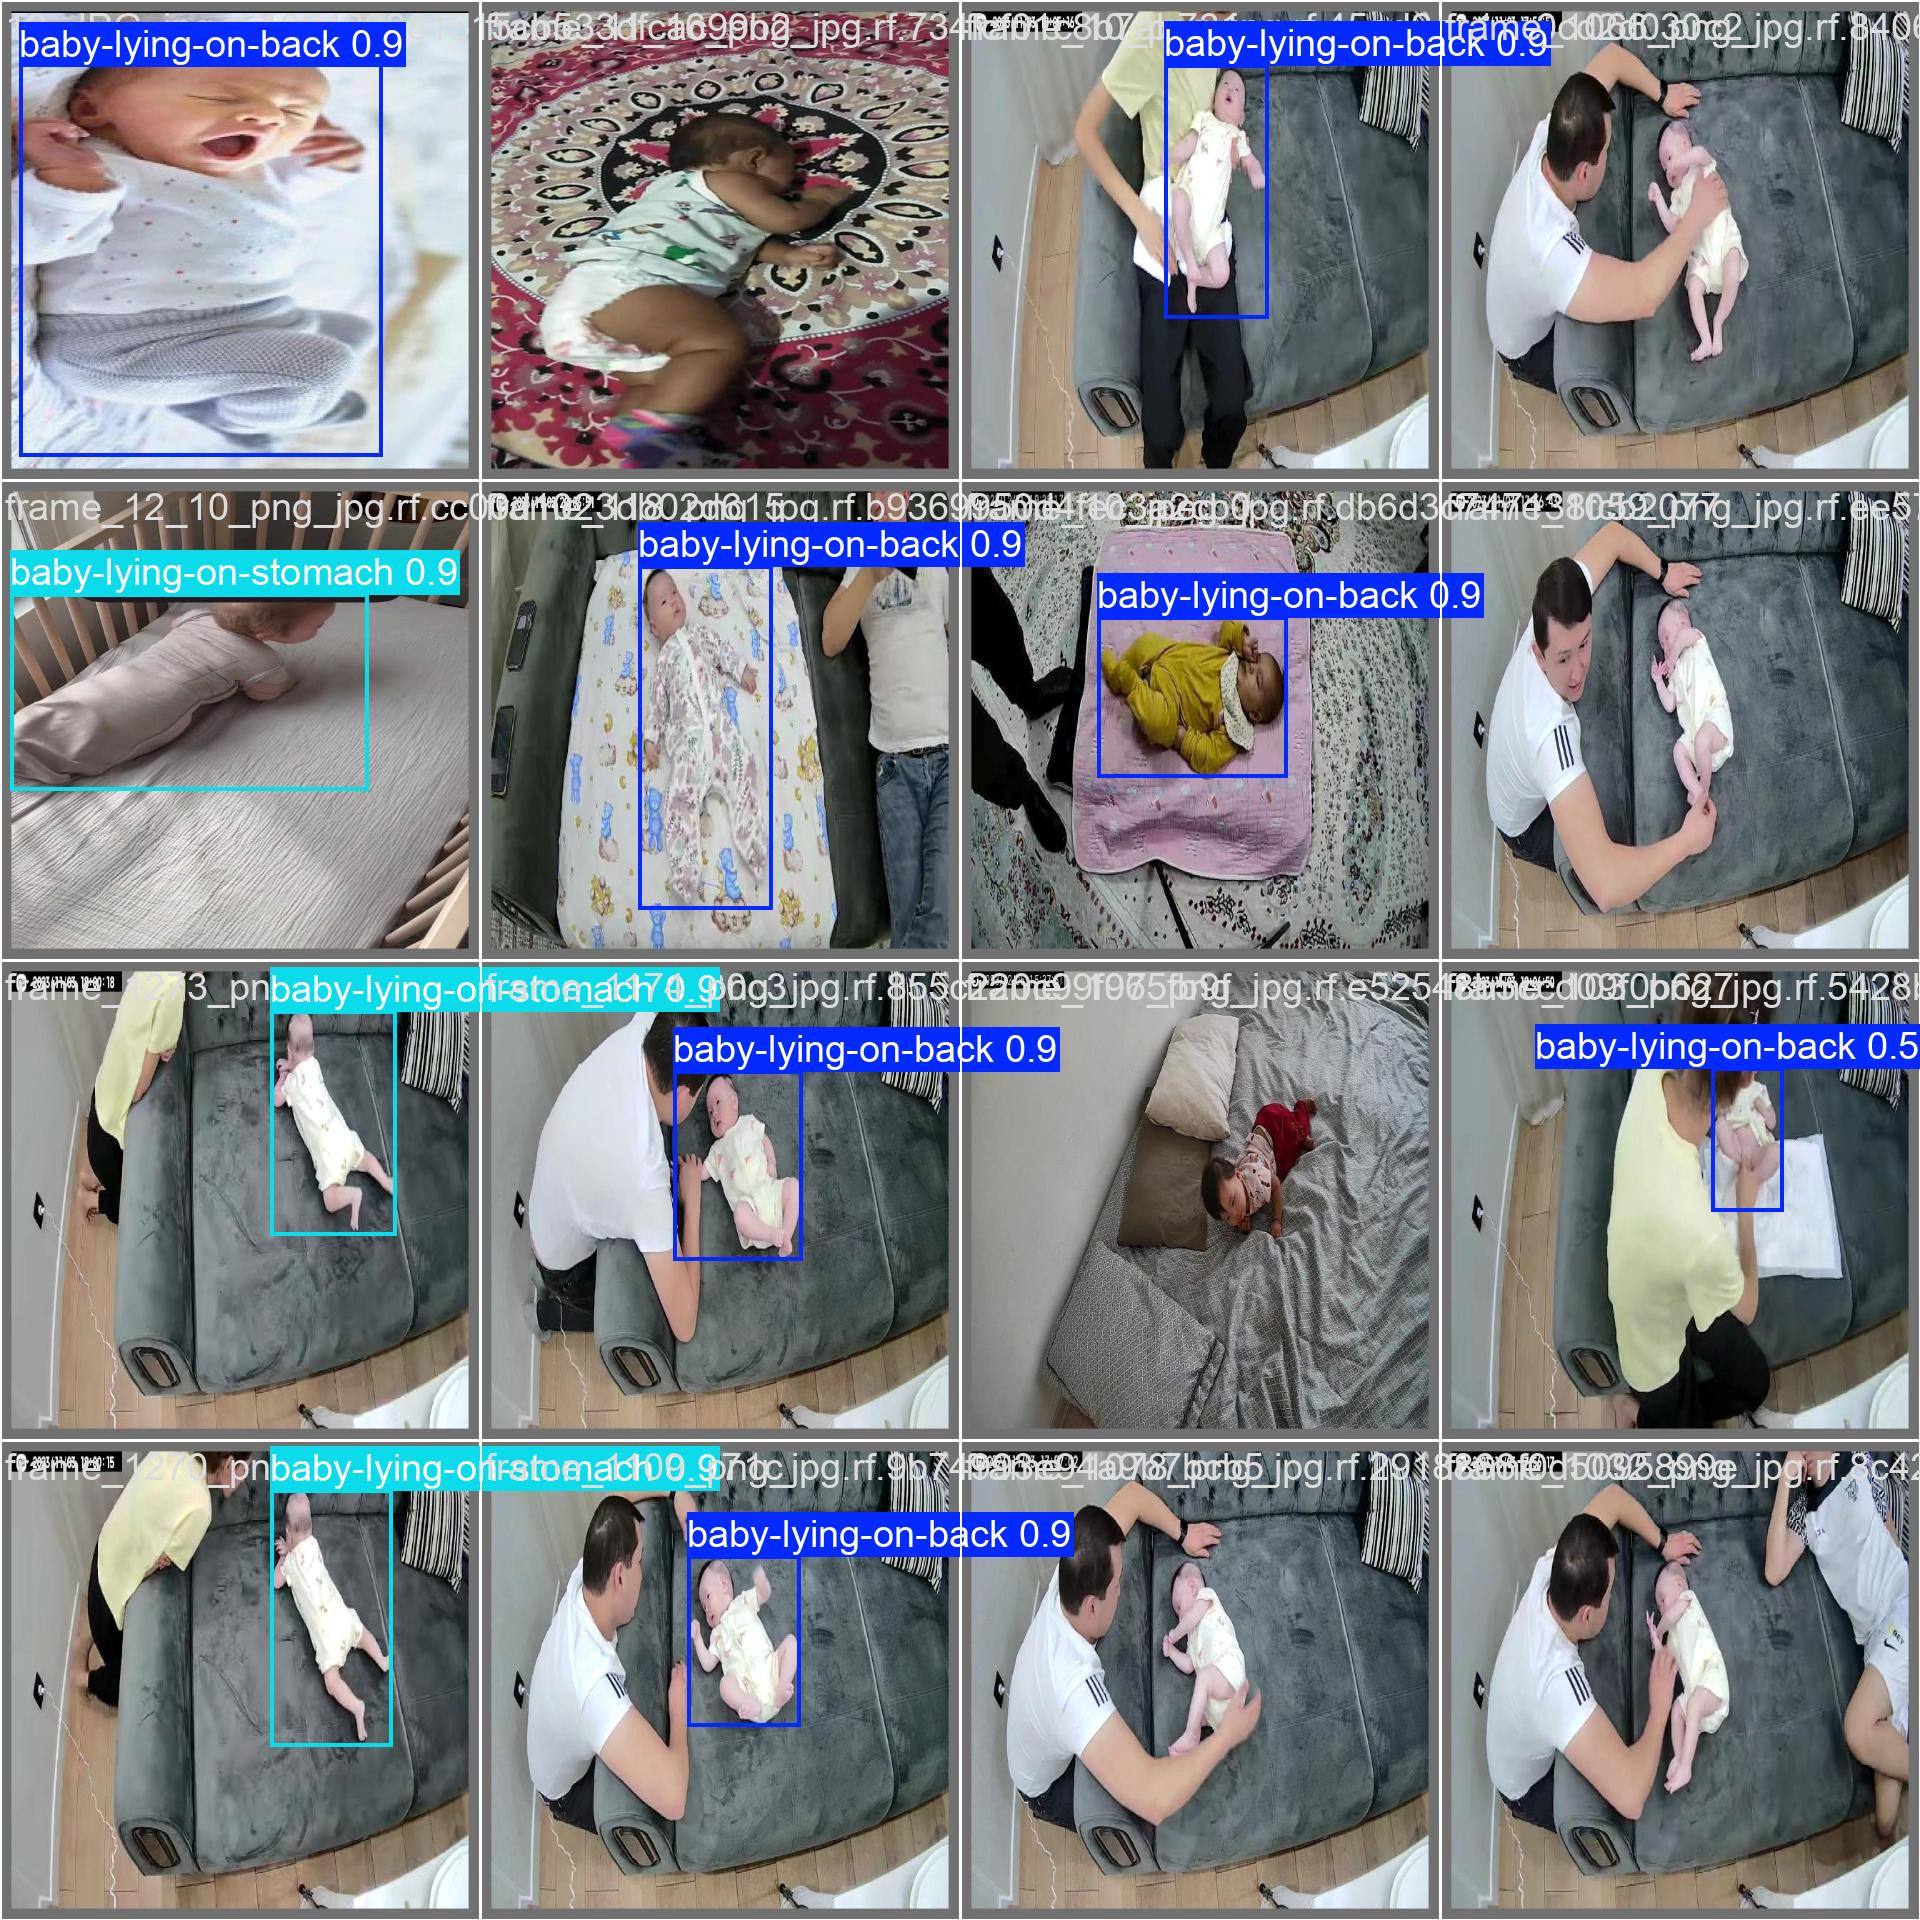

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#### Validation and Results :

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/sudden-infant-death-syndrome-3/valid/labels.cache... 307 images, 85 backgrounds, 0 corrupt: 100% 307/307 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 222. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:05<00:00,  3.93it/s]
                   all        307        222      0.895      0.888      0.941       0.81
    baby-lying-on-back        130        130      0.919      0.885      0.949       0.79
 baby-lying-on-stomach         92         92      0.871      0.891      0.932      0.829
Speed: 1.3ms prep

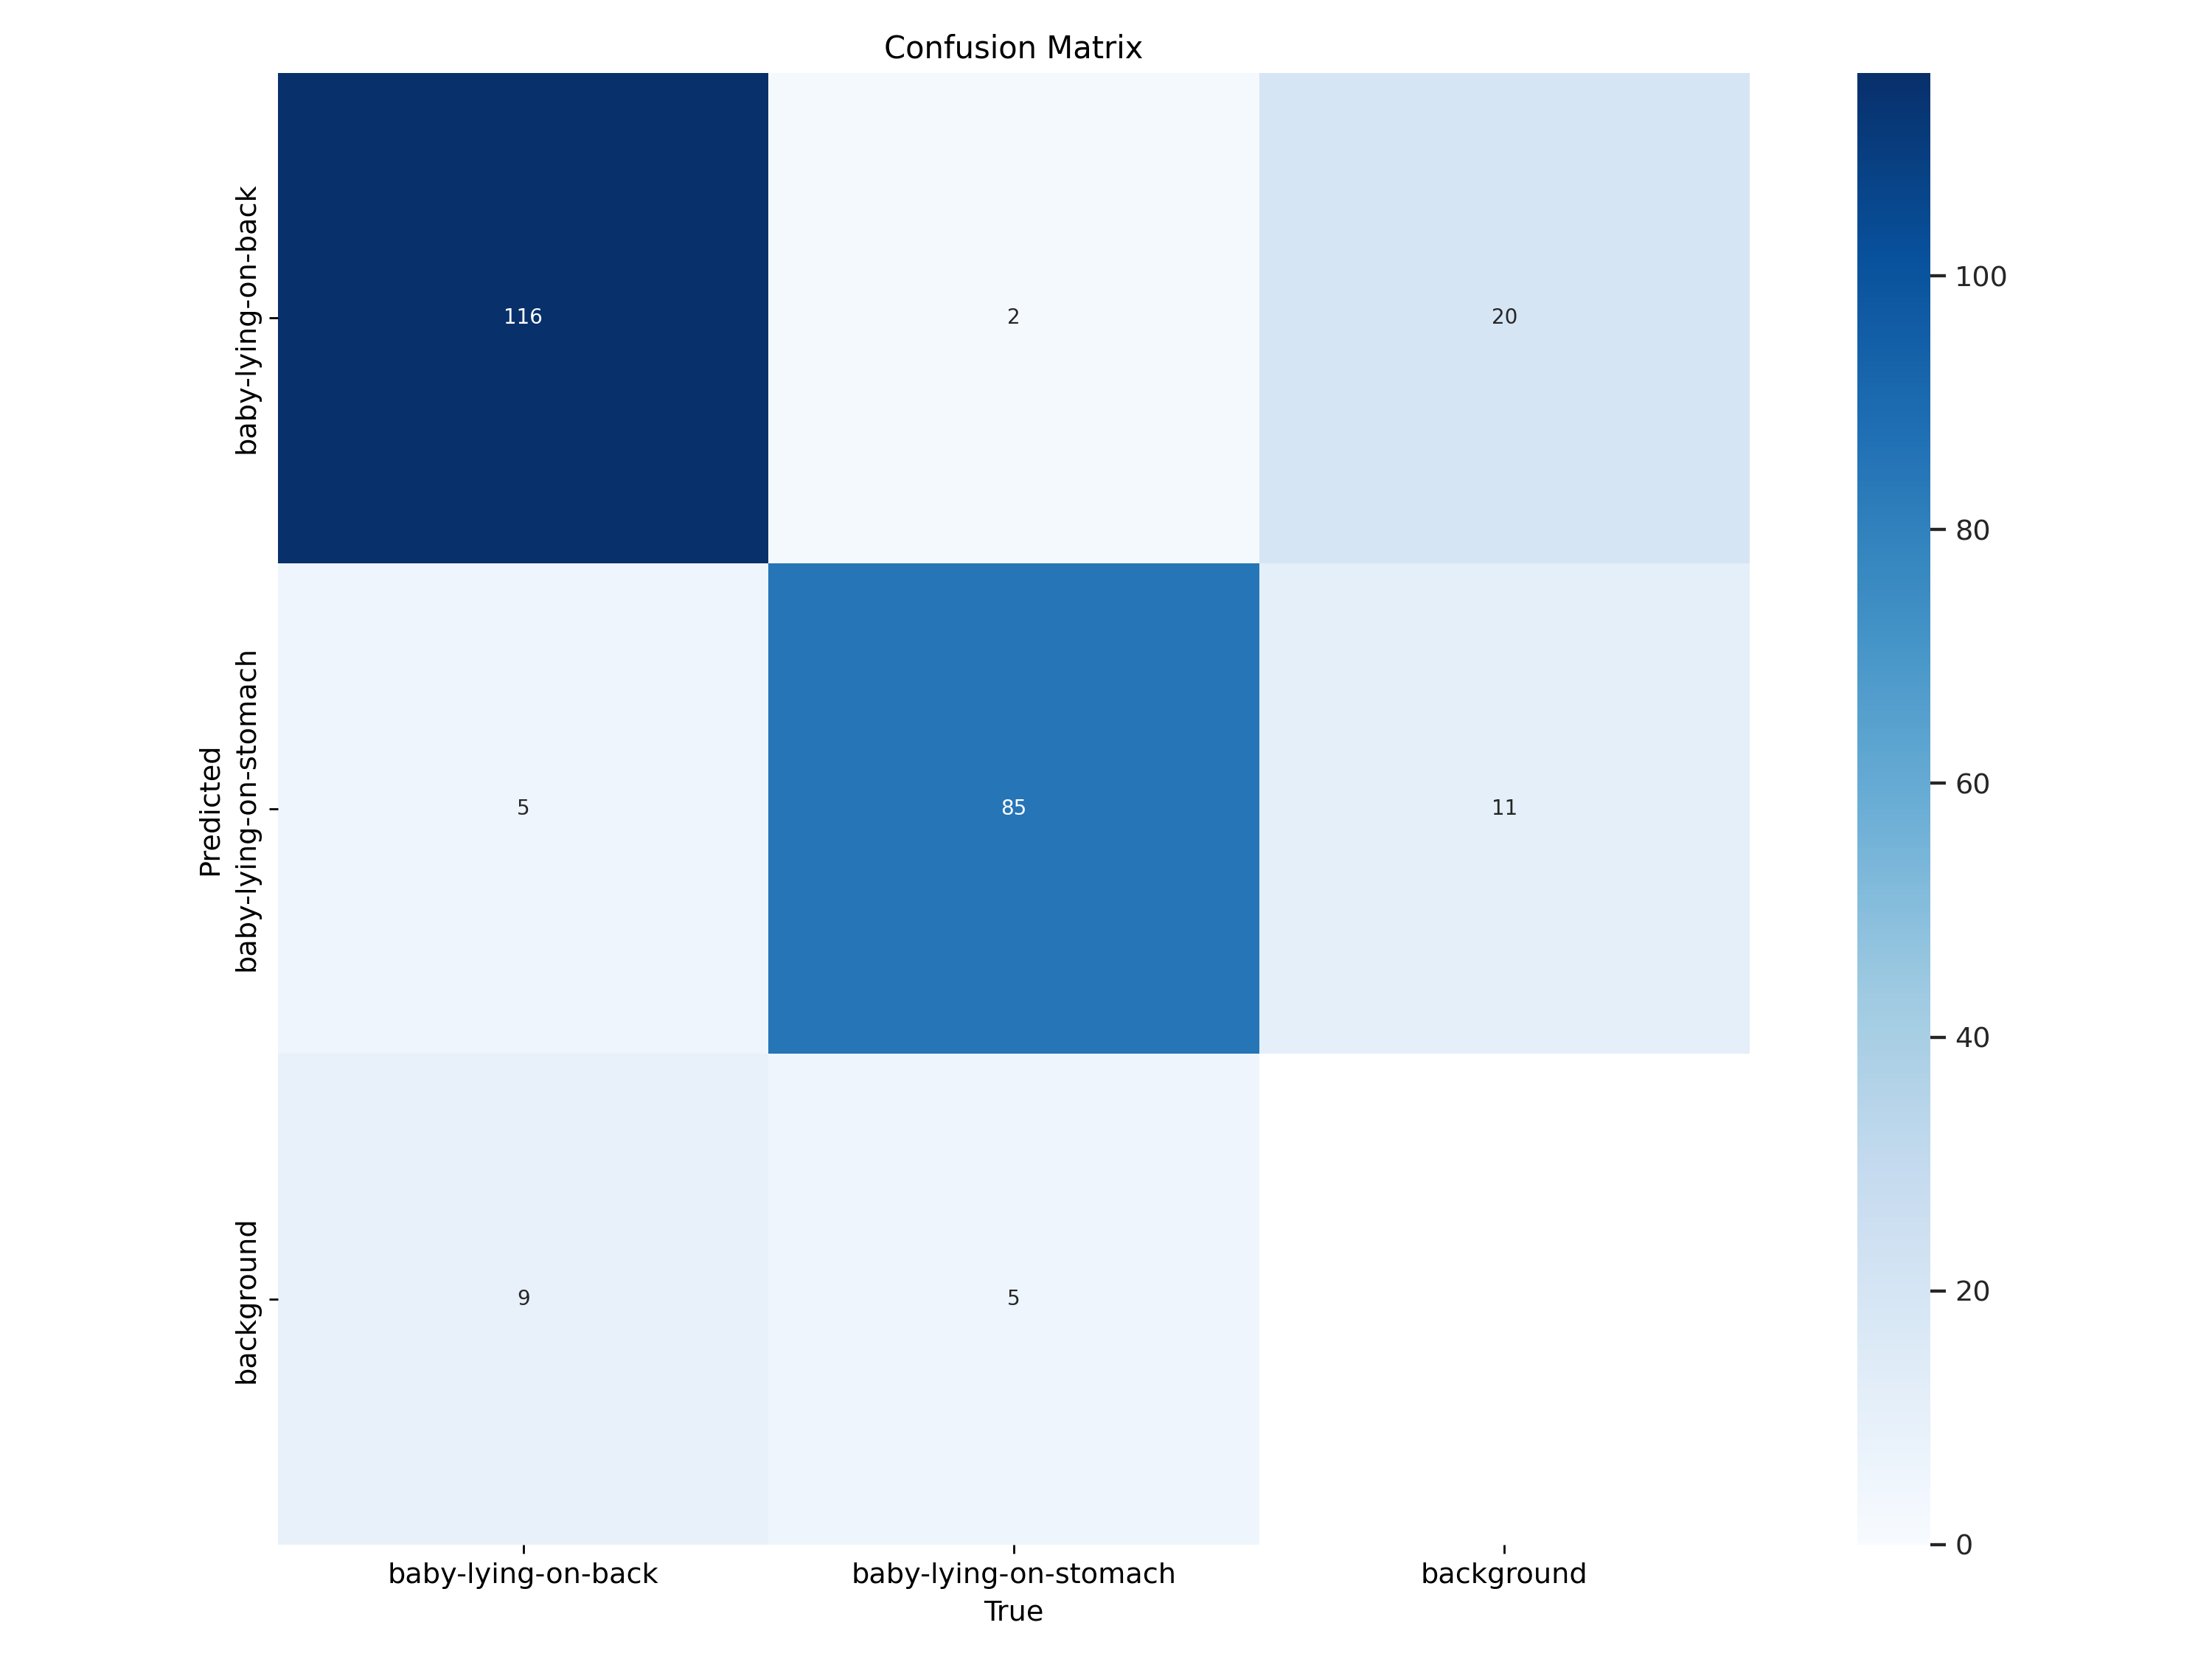

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

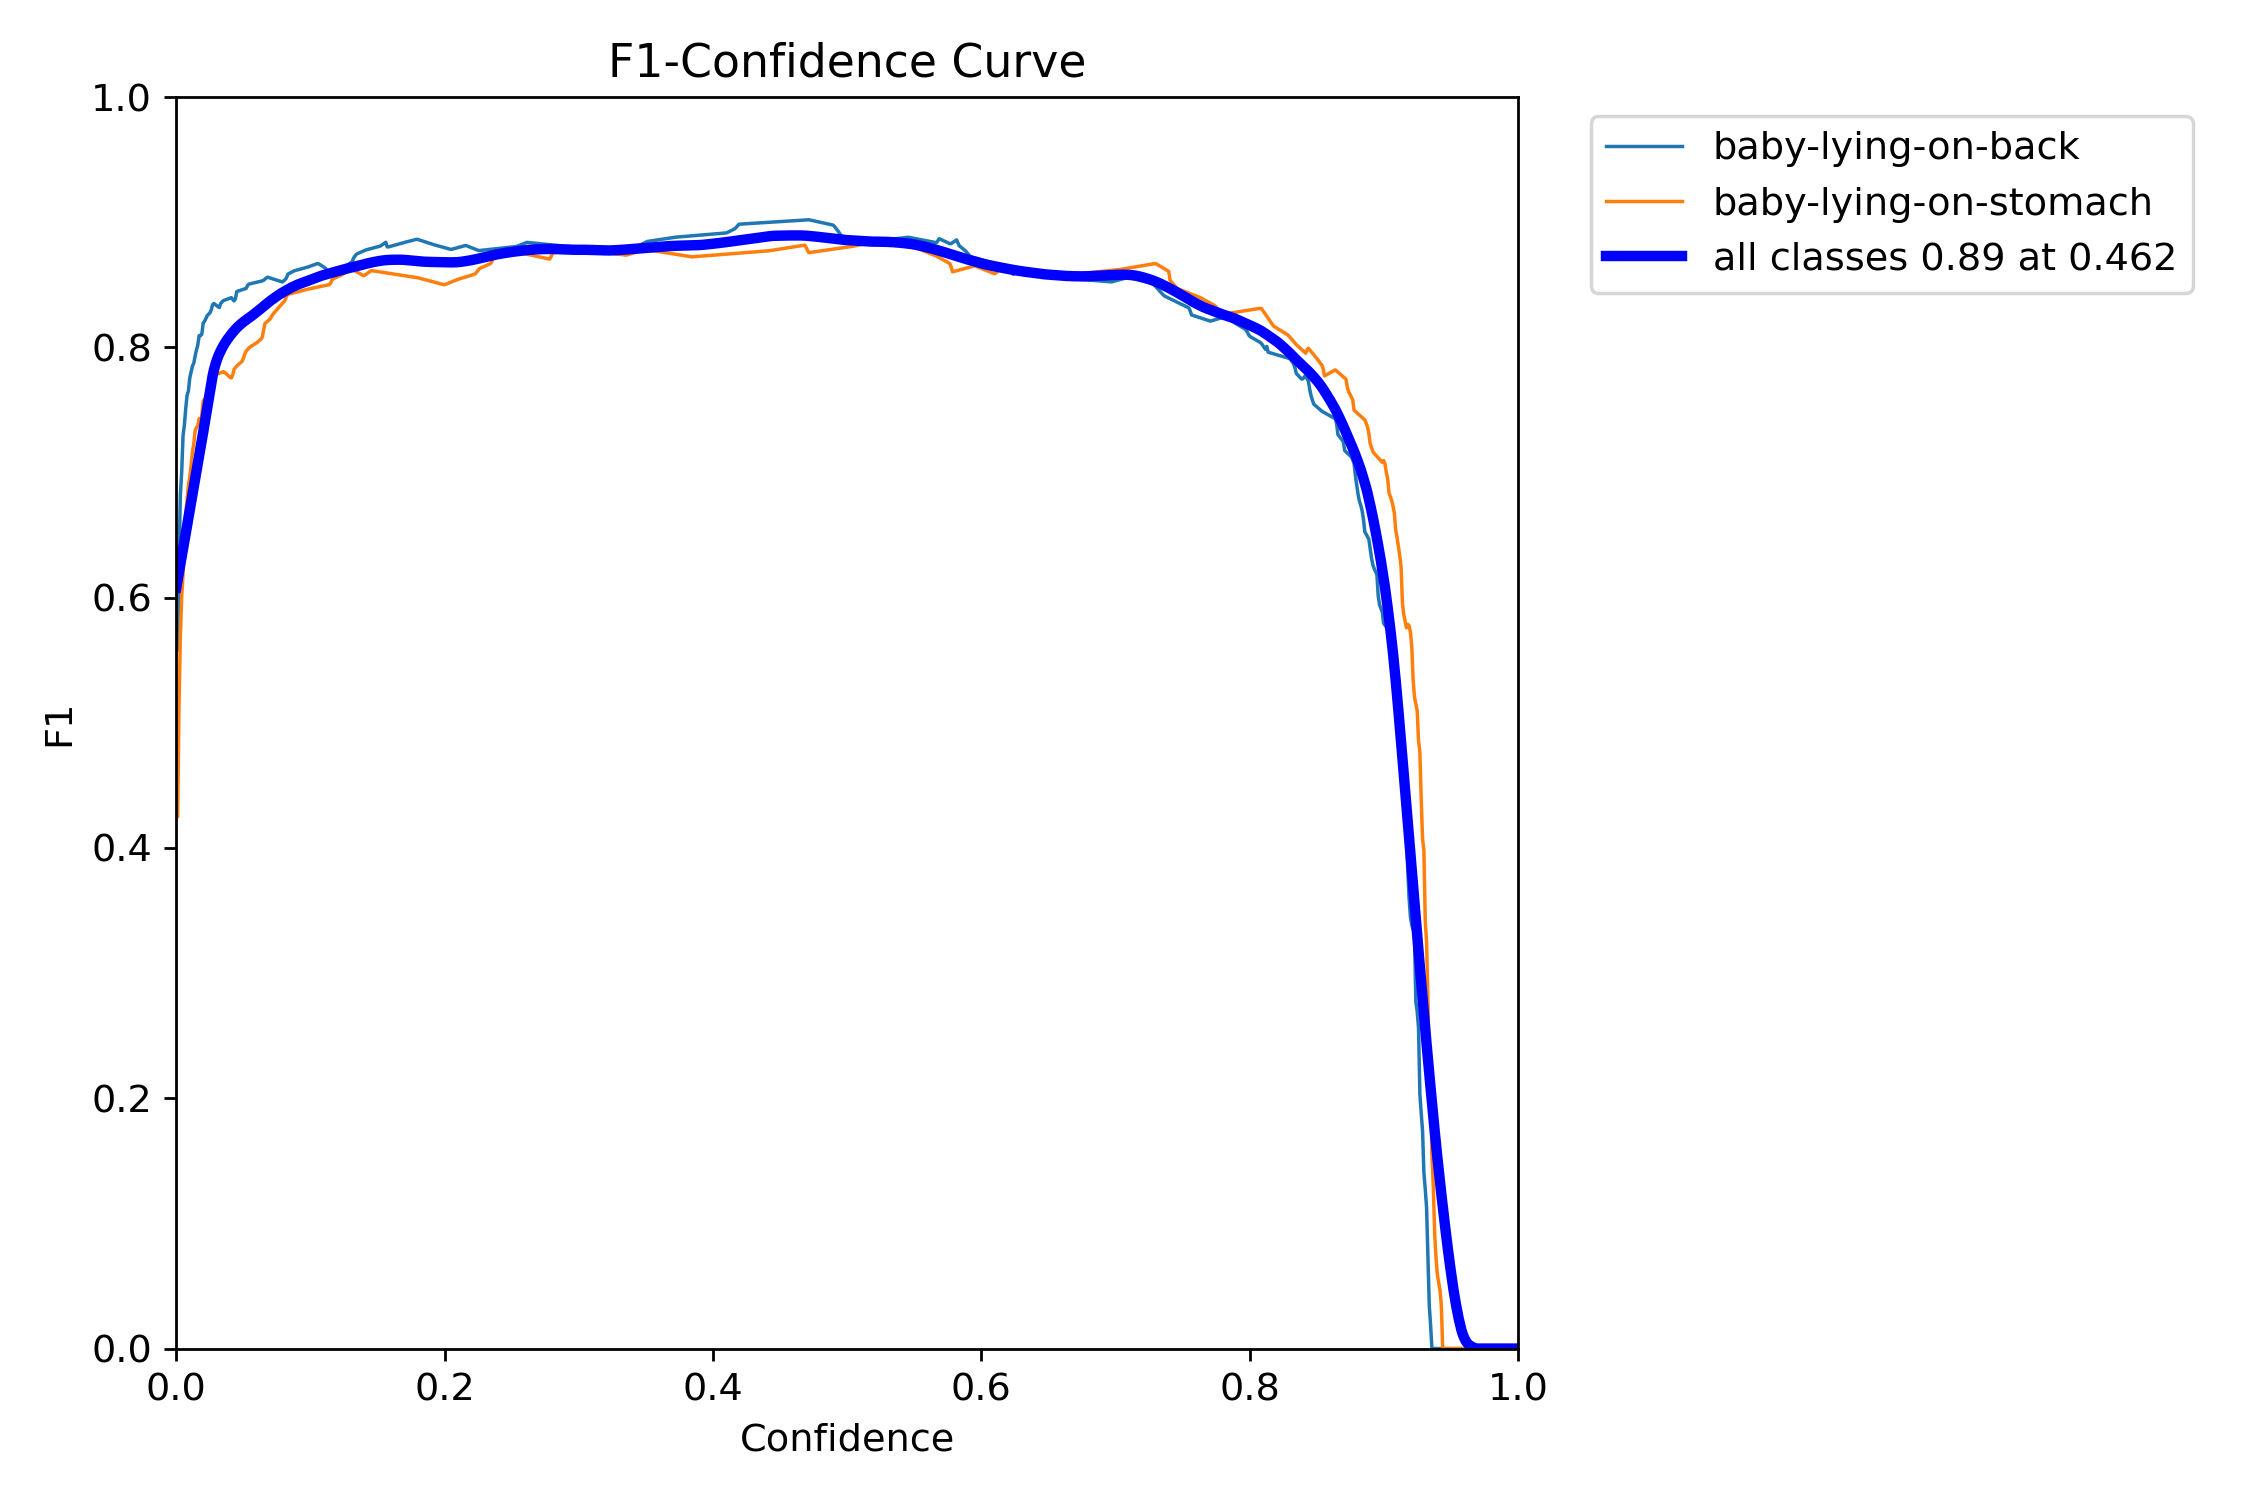

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/F1_curve.png', width=600)

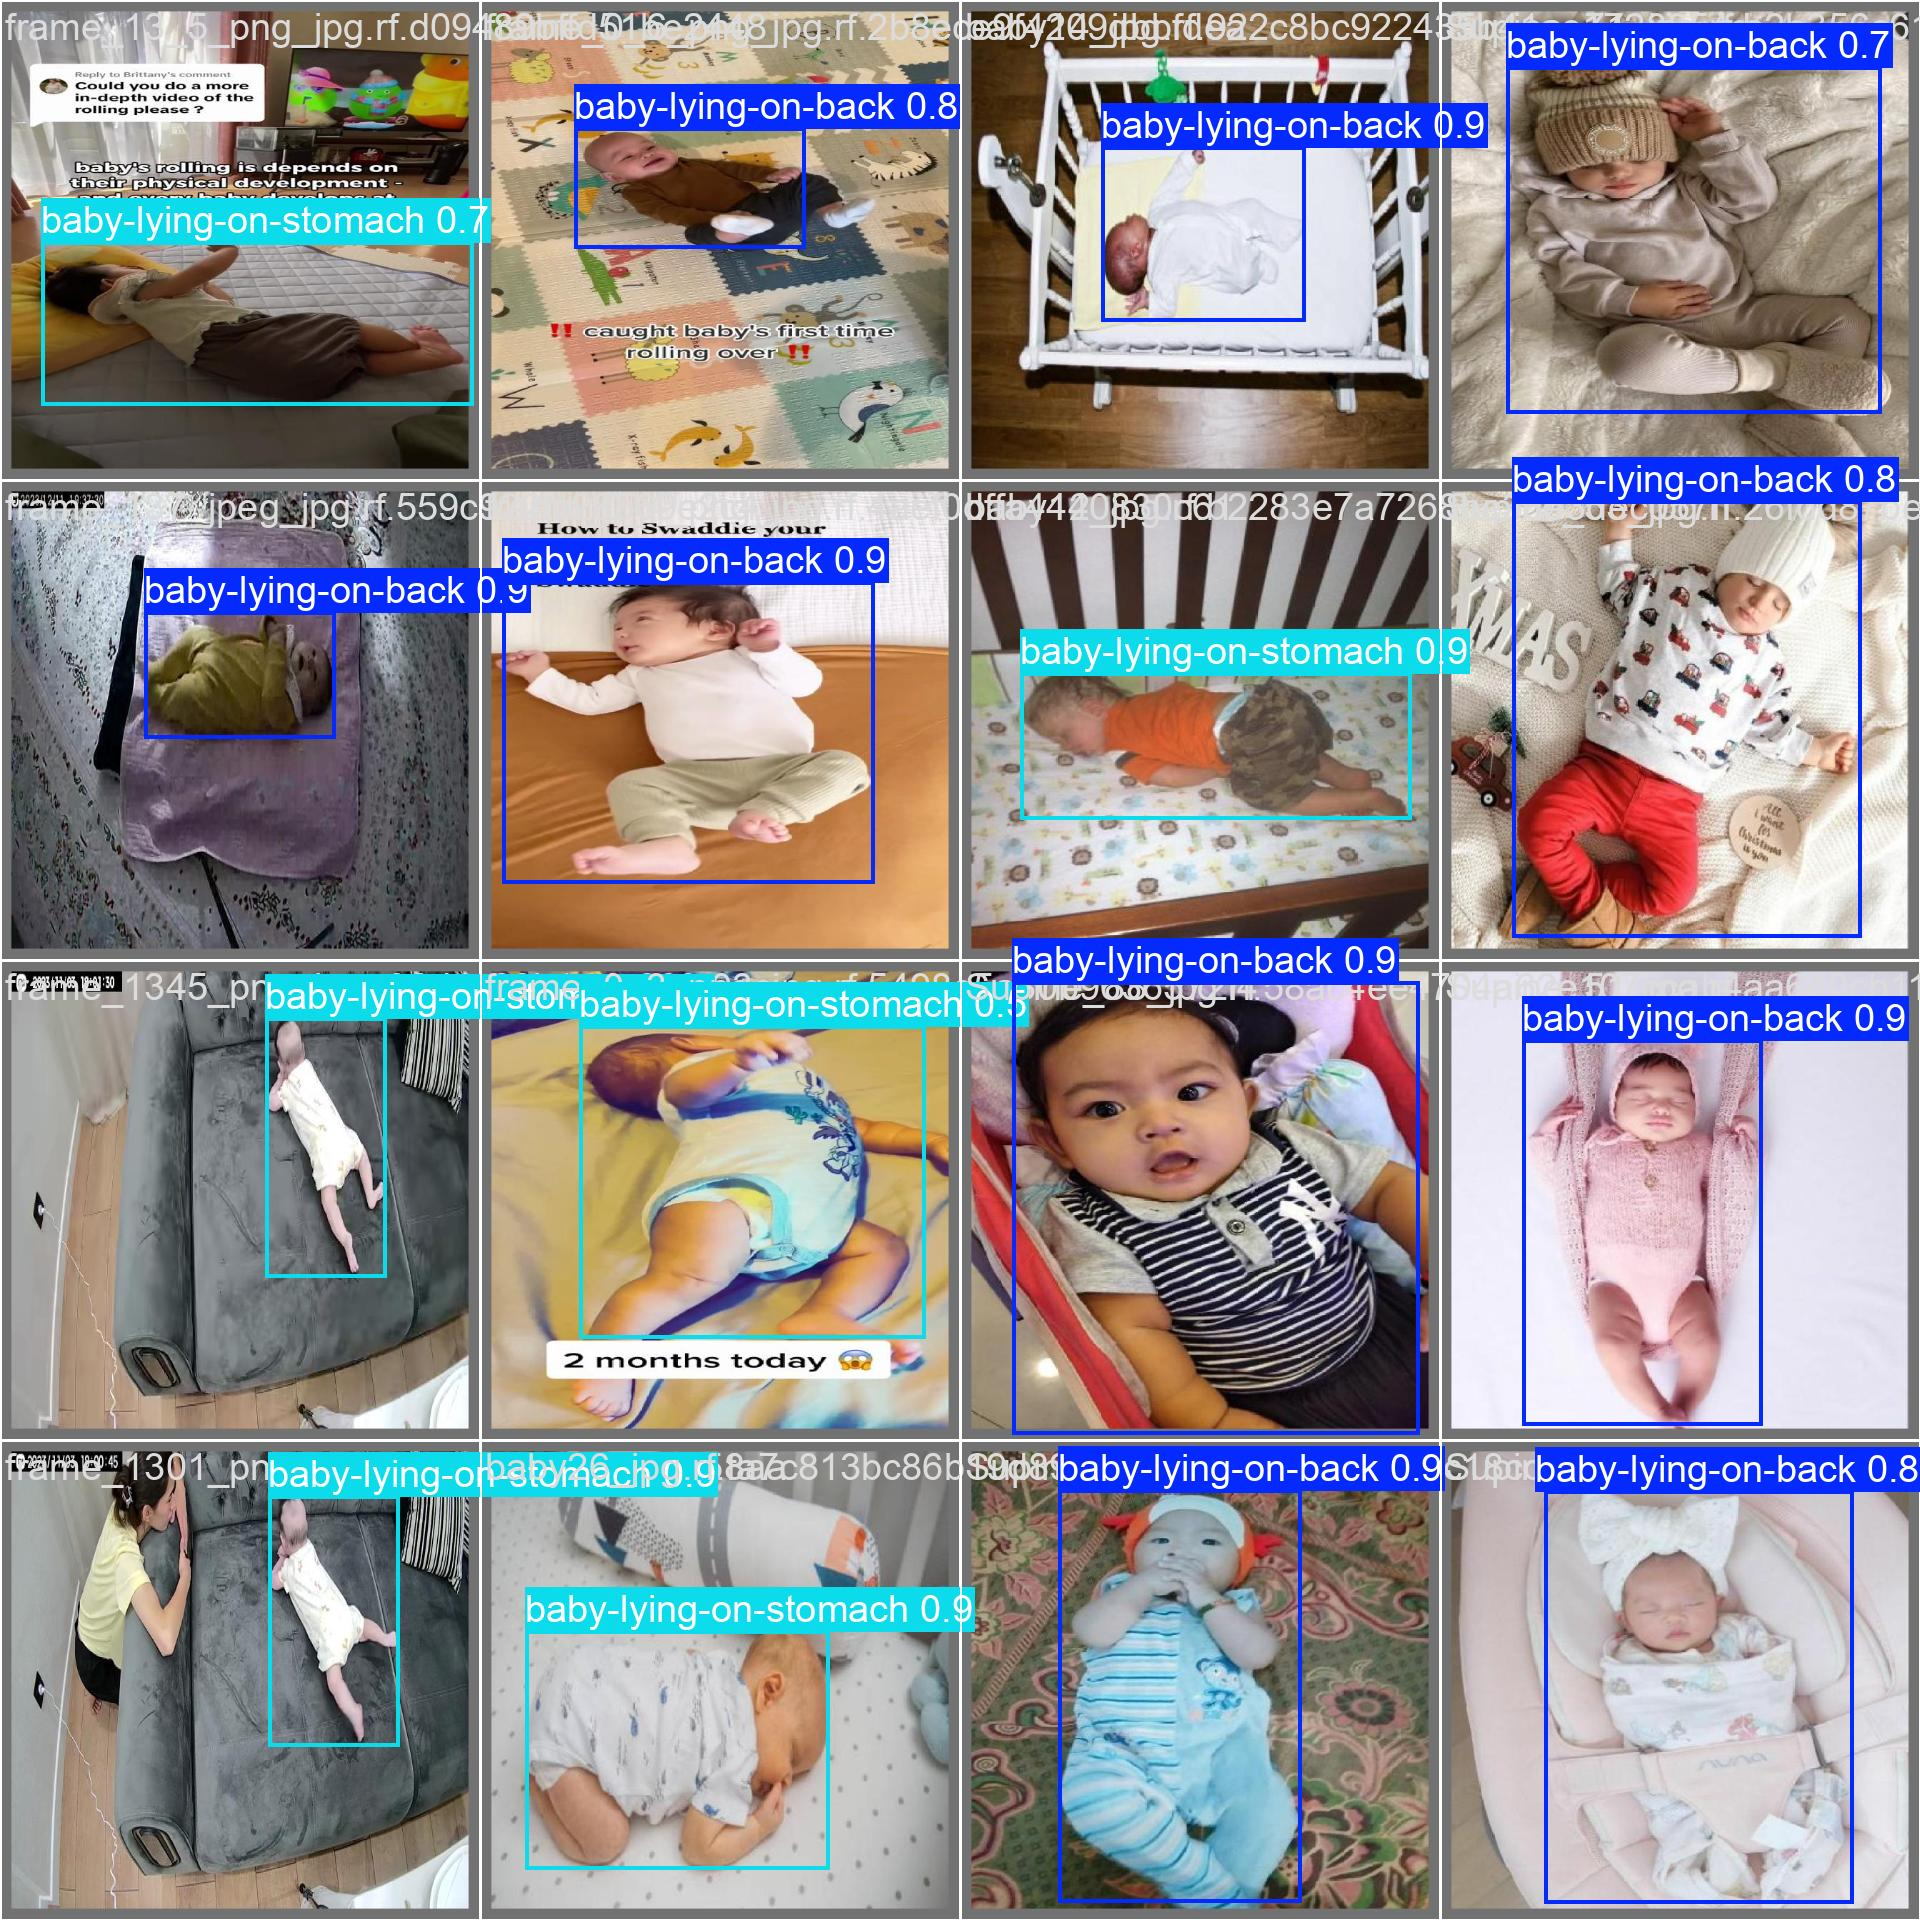

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/val_batch2_pred.jpg', width=600)

#### Inference and Results :

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/05EF05D1-F2DA-45A8-9985-09326C822E4B_JPG.rf.1c8c372aada9ac9b3c38b23c67b97e26.jpg: 640x640 (no detections), 15.6ms
image 2/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1214_png_jpg.rf.16ebb9fd0b4bdb16f5255f5a9145193b.jpg: 640x640 1 baby-lying-on-stomach, 15.6ms
image 3/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1923_png_jpg.rf.acb1066cbb1411f216c516f8a6942eac.jpg: 640x640 1 baby-lying-on-stomach, 15.6ms
image 4/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1962_png_jpg.rf.ae00d246aa04d3790517be6c45b7a83d.jpg: 640x640 1 baby-lying-on-stomach, 15.5ms
image 5/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/19_jpg.rf.db226ec867b5666c1b7c09364851e05f.jpg: 640x640 1 baby-lying-on-

Displaying: Supine_64_jpg.rf.4b48af35bd40149d0de404271cb8000d.jpg


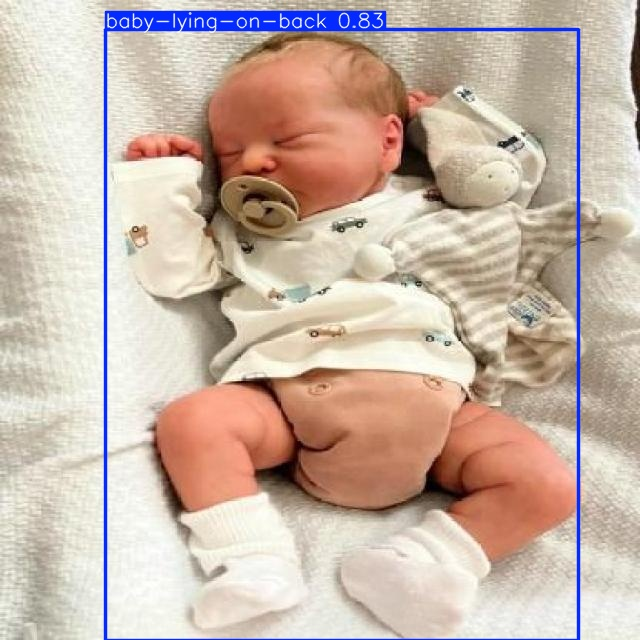

Displaying: frame_163_png_jpg.rf.0b3d464c5b01ace9091da03d5d640c2d.jpg


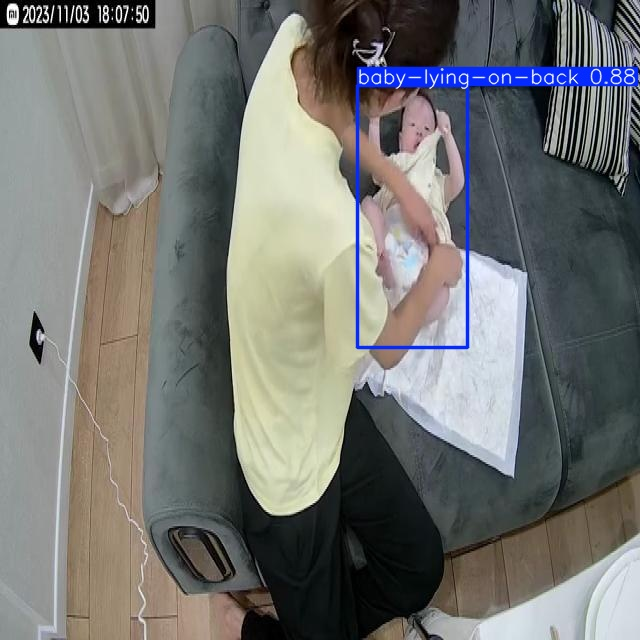

Displaying: Prone_116_jpg.rf.6881d266661e04c30388205bda627ef0.jpg


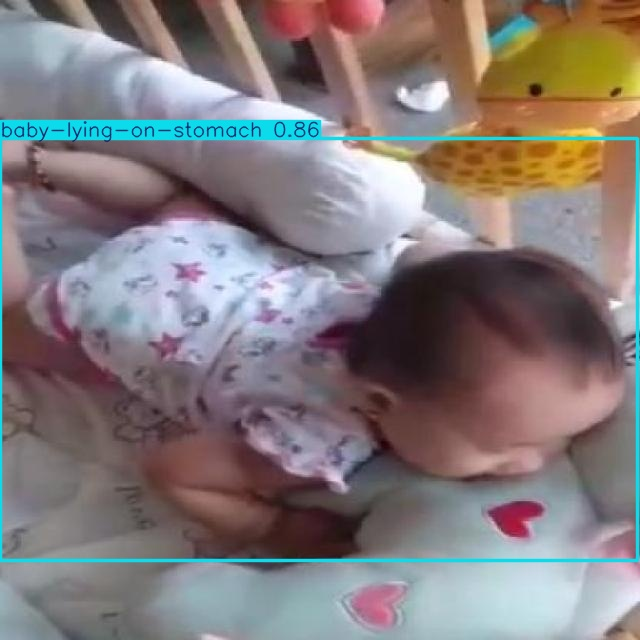

Displaying: frame_478_png_jpg.rf.6cc699b5cb3e2328f4b4cdced86f12e4.jpg


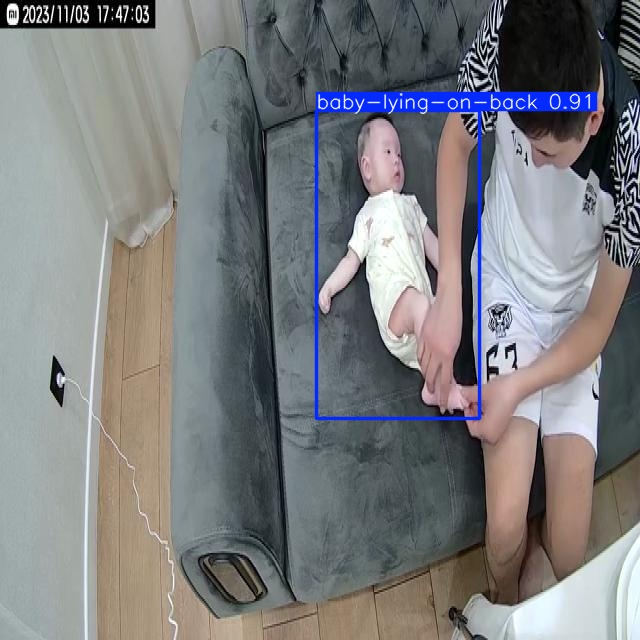

Displaying: IMG-20240322-WA0062_jpg.rf.d0604ec6b4a0bdb6cd83f61b59529b5b.jpg


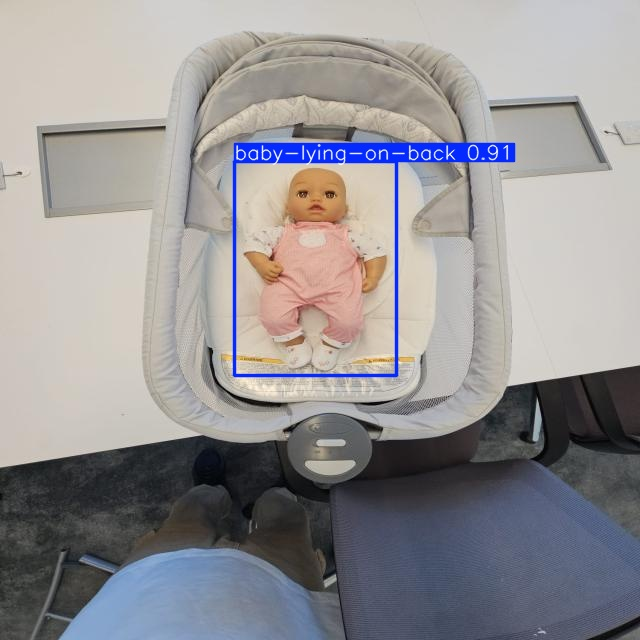

Displaying: Supine_178_jpg.rf.7fc9fe6166ebcabfbf7670a92e22eca5.jpg


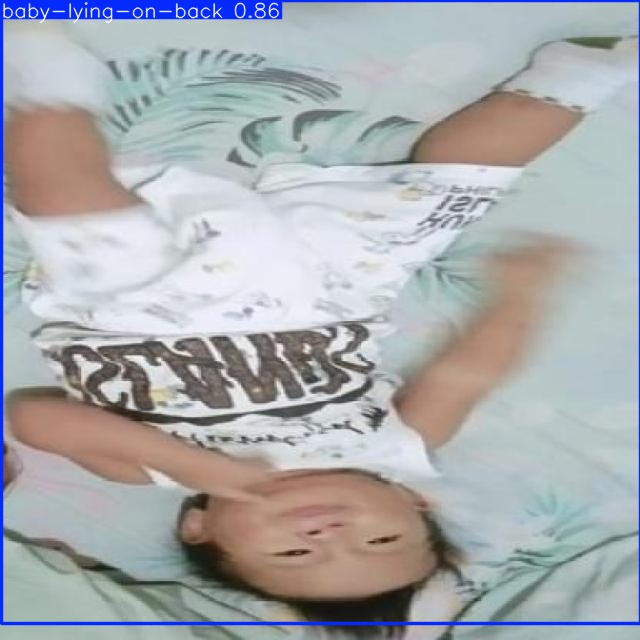

Displaying: frame_496_png_jpg.rf.be2686a1cb067aa8469f99a6513d0ed5.jpg


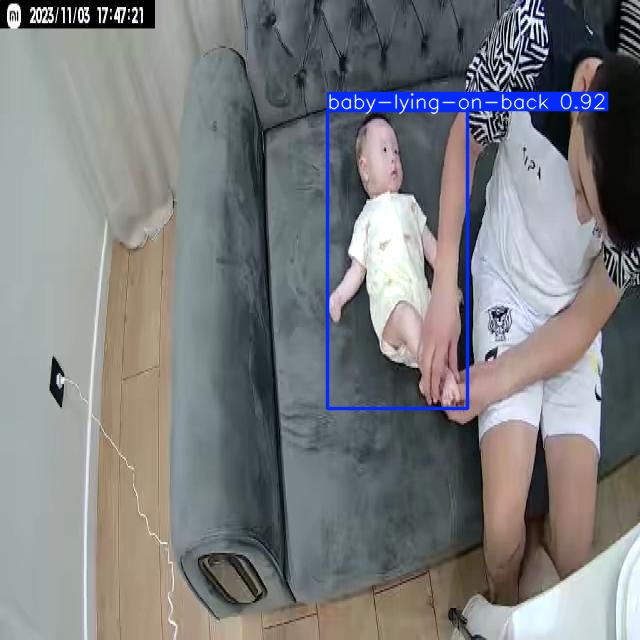

Displaying: frame_1287_png_jpg.rf.c20d54cb900994c1f80eae0d82794468.jpg


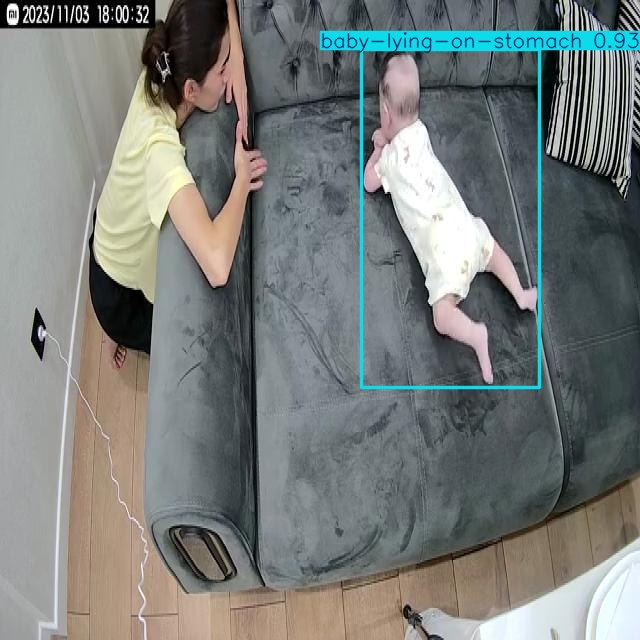

Displaying: baby2_jpg.rf.4025d08399c8b2a4a6052d10788664d8.jpg


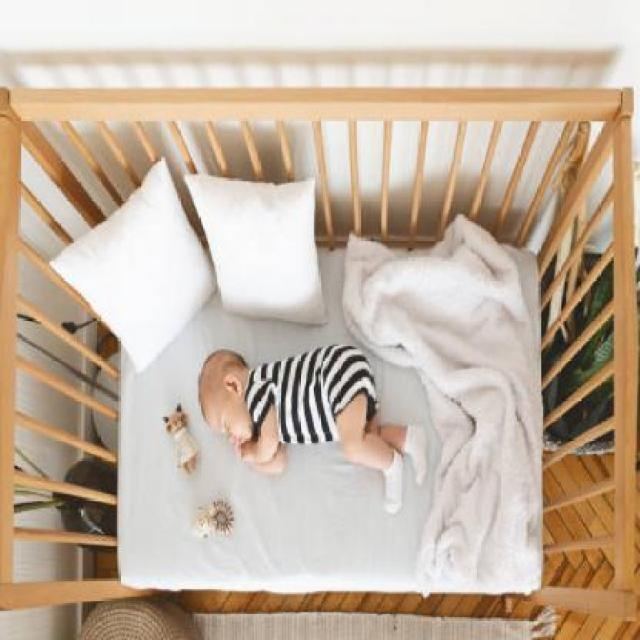

Displaying: Prone_71_jpg.rf.1cd50bf4fb0f82a6ab93b9a060821761.jpg


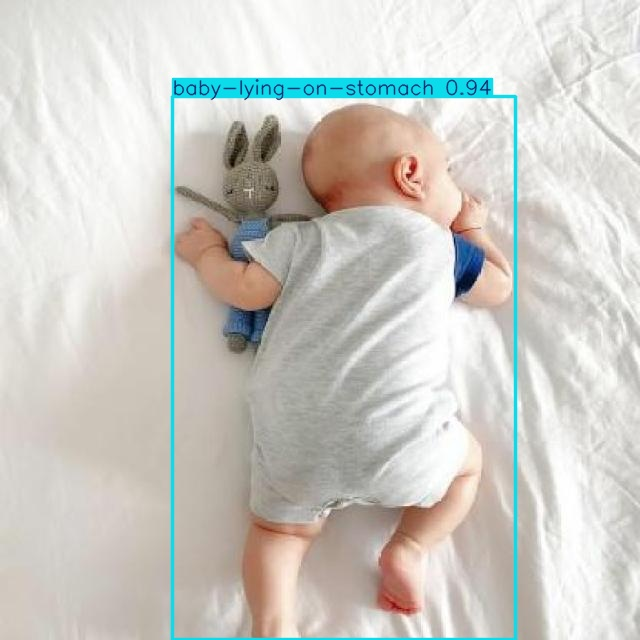

Displaying: Prone_60_jpg.rf.aa6aa7497863ffe56e01281f41a85743.jpg


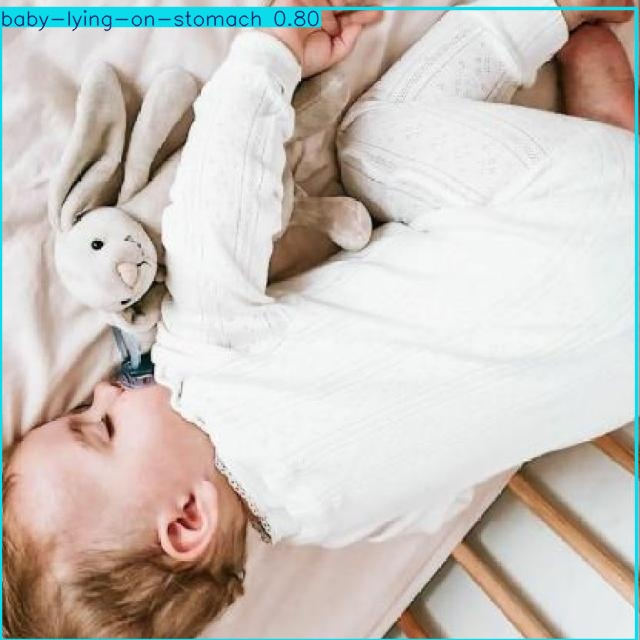

Displaying: IMG-20240322-WA0057_jpg.rf.f2be0273ea544346abaabd1f2800c136.jpg


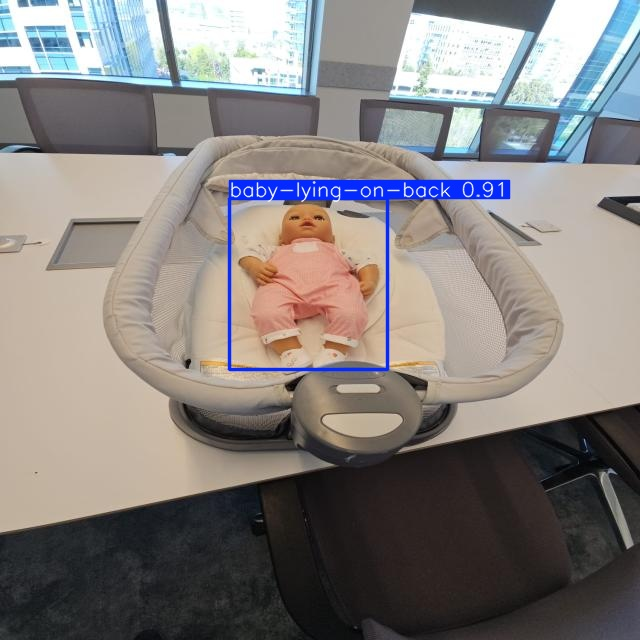

Displaying: Sideways_78_jpg.rf.cde3ae4d01832b9a3606ffbc6a8cf6d2.jpg


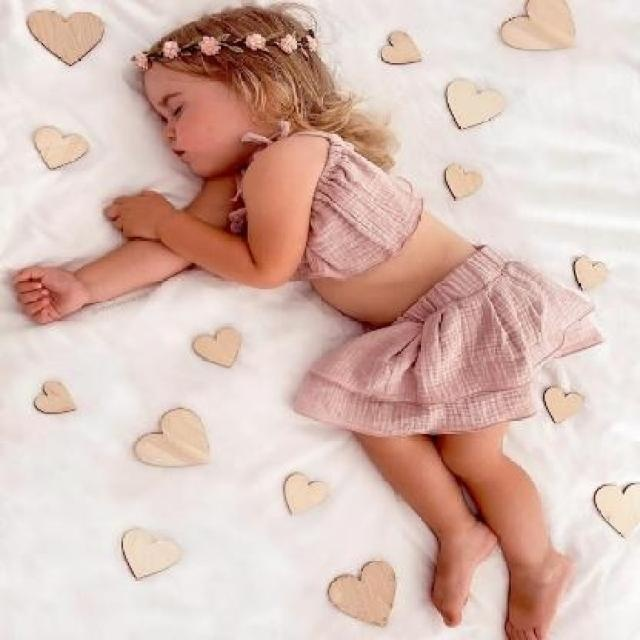

Displaying: frame_6_3_png_jpg.rf.60fd6d45a7a43f27214ae2db979e23d8.jpg


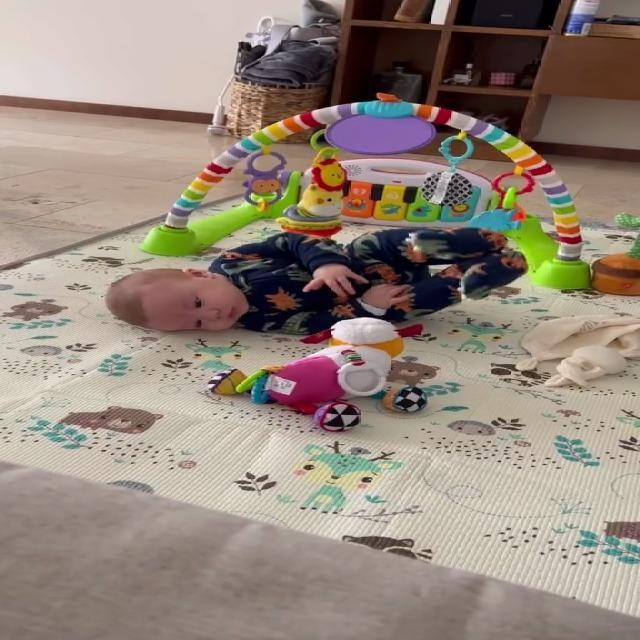

Displaying: IMG_0468_jpeg.rf.60428ca74f3a9248915b8d6e280194b6.jpg


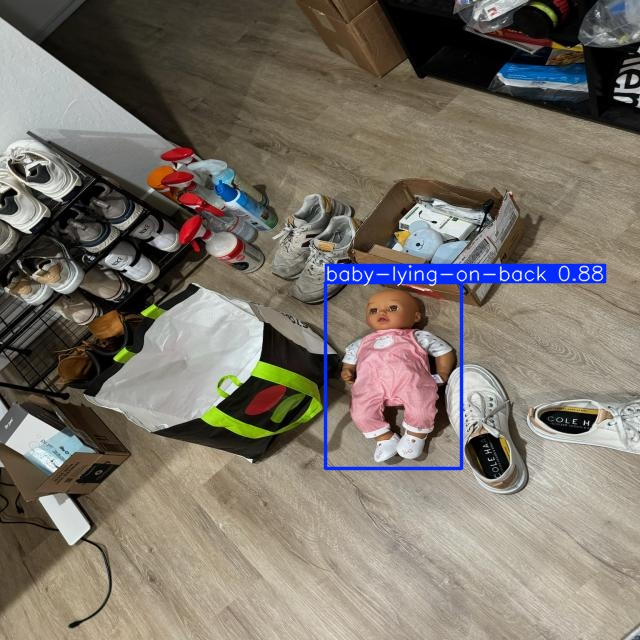

Displaying: Sideways_42_jpg.rf.389547fcc39745a769dc97dc00b5f1a3.jpg


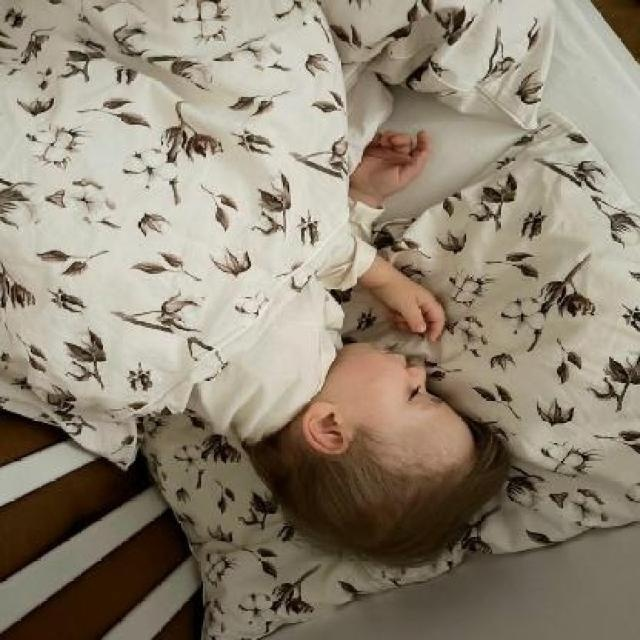

Displaying: frame_1339_png_jpg.rf.430575c2faf177c4c1b3d5c8f7298bf7.jpg


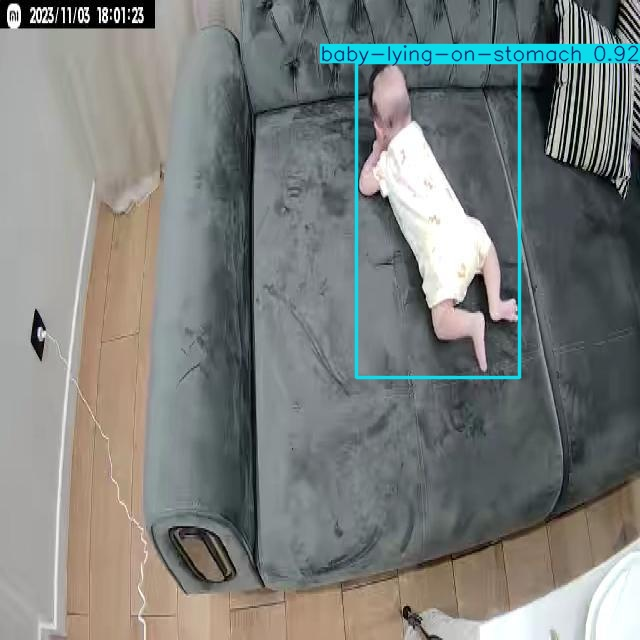

Displaying: 52_jpg.rf.c739e4fd4f7bb98b9214a885cdade438.jpg


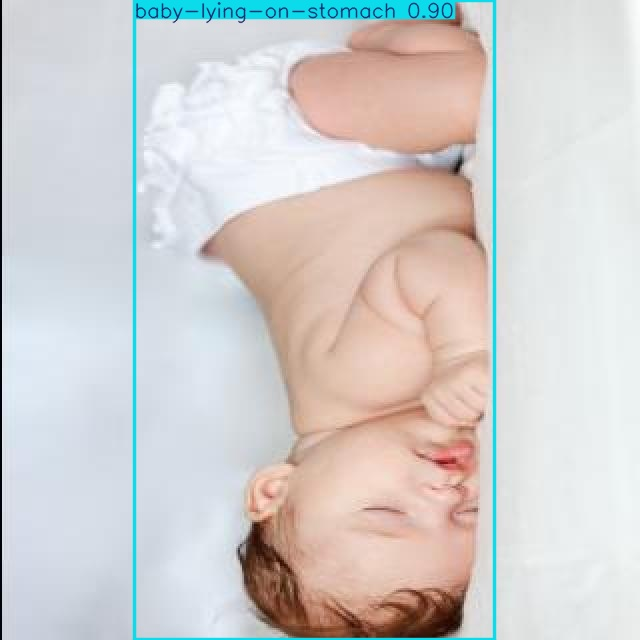

Displaying: Supine_85_jpg.rf.6014dd38f370610916527fefadd7ee0e.jpg


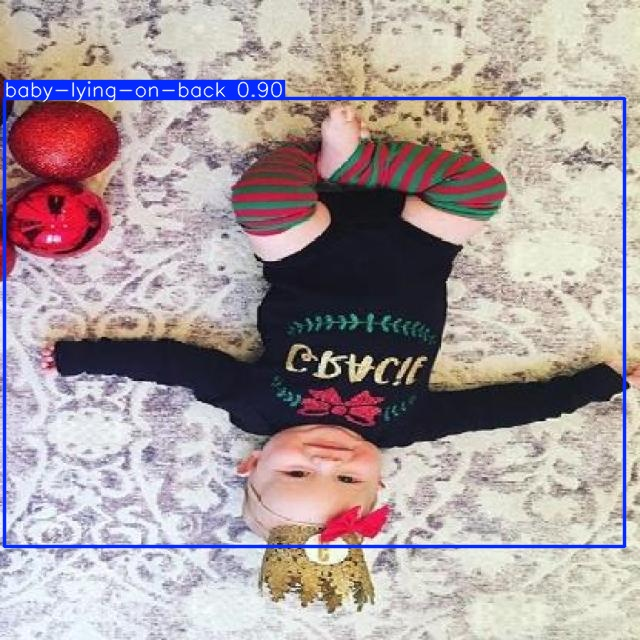

Displaying: Supine_89_jpg.rf.cad46793f3b6a01931f24c6e553e0337.jpg


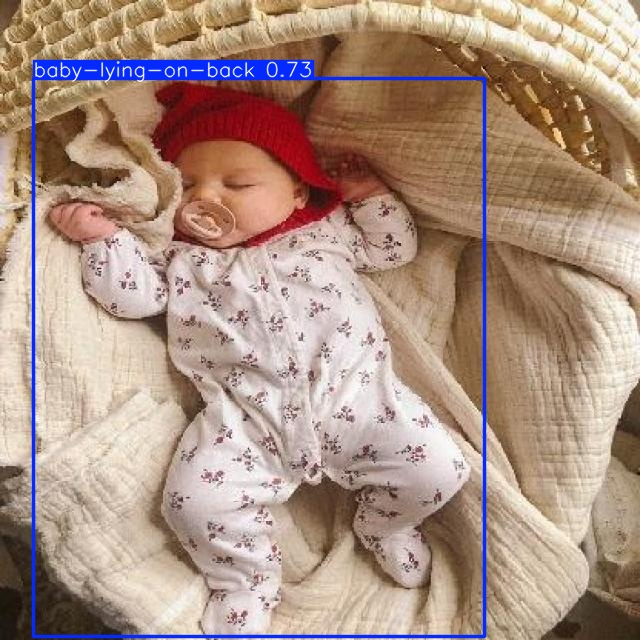

In [ ]:
import os
import random
from IPython.display import display, Image

folder_path = f"{HOME}/runs/detect/predict/"

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

selected_images = random.sample(image_files, min(20, len(image_files)))

for img_file in selected_images:
    img_path = os.path.join(folder_path, img_file)
    print(f"Displaying: {img_file}")
    display(Image(filename=img_path, width=400))


In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
!cp -r {HOME}/datasets /content/drive/MyDrive/
!cp -r runs /content/drive/MyDrive/
!cp -r runs/* /content/drive/MyDrive/

#### Deploy on roboflow :

In [ ]:
project = rf.workspace("infantbabiessleep").project("sudden-infant-death-syndrome")
version = project.version(3)
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
